## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

print(df.describe())

print("--------------------------------------------------")
print(df.shape)


               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [5]:
if df['y'].dtypes == 'object':
    le = LabelEncoder()
    df['y'] = le.fit_transform(df['y'])

print(df['y'].dtypes)

int64


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [6]:
bank_client = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]

for col in bank_client.columns:
    print("-----")
    print(f"{col}: {bank_client[col].unique()}")

-----
age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
-----
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
-----
marital: ['married' 'single' 'divorced' 'unknown']
-----
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
-----
default: ['no' 'unknown' 'yes']
-----
housing: ['no' 'yes' 'unknown']
-----
loan: ['no' 'yes' 'unknown']


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Max in 'Age': 98
Min in 'Age': 17
Number of NaN values in 'Age': 0
Skew : 0.7846968157646645


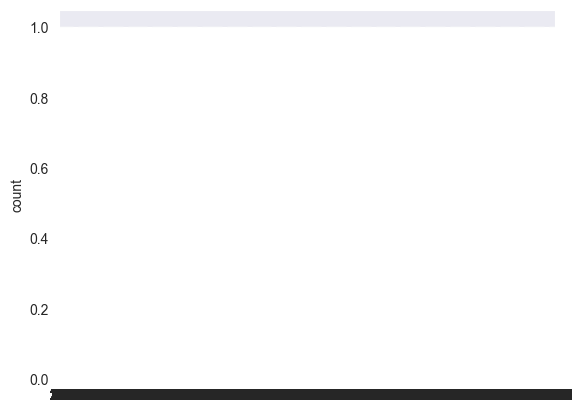

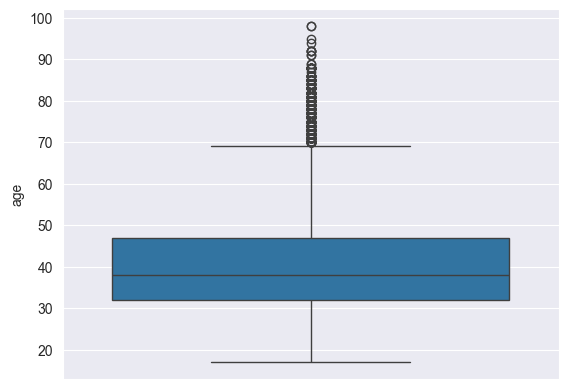

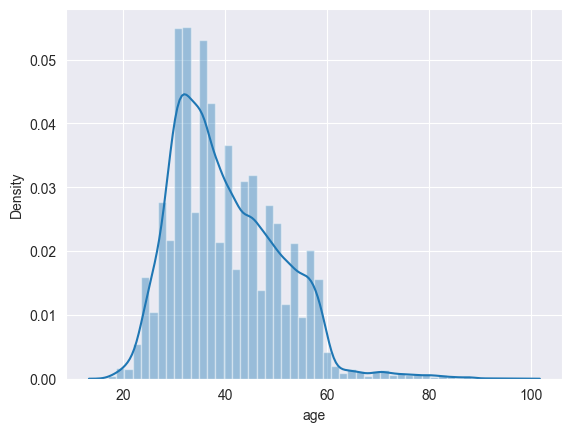

In [7]:
print("Max in 'Age':", bank_client['age'].max())
print("Min in 'Age':", bank_client['age'].min())

print("Number of NaN values in 'Age':", bank_client['age'].isna().sum())

print("Skew :", bank_client['age'].skew())

sns.countplot(bank_client['age'])
plt.show()

sns.boxplot(bank_client['age'])
plt.show()

sns.distplot(bank_client['age'])
plt.show()

**Висновки з 1-4 завдання (детальні)**

1. Y :
   - Цільовий атрибут визначений як "y", який вказує, чи підписав клієнт депозит ("yes" або "no").
   - Цільовий атрибут був перетворений з категоріального у числовий формат для подальшого аналізу та моделювання.

2. age :
   - Максимальне значення віку складає 98 років, мінімальне - 17 років.
   - У даному атрибуті немає пропущених значень (NaN).
   - Графіки візуалізації (countplot, boxplot, distplot) демонструють, що розподіл віку досить нормальний з легкою нахилом управо, але з важким правим хвостом. Це може свідчити про те, що є невелика кількість старших осіб вище 60-ти років, які можуть бути аномальними значеннями або просто представляти меншість вибірки.
      
3. 
   - Аналіз атрибутів показує, що вік клієнтів різноманітний, але загалом сконцентрований від 20 до 60 років.
   - Цільовий атрибут "y" було успішно перетворено для подальшого використання в моделях машинного навчання.
   - Для кращого розуміння даних можна додатково провести аналіз інших атрибутів та їх взаємозв'язок з цільовим атрибутом "y". 

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [11]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers

In [43]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan,age_group
38452,98,5,1,0,1,2,0,Q4
38455,98,5,1,0,1,2,0,Q4


**Висновки з завдання 5 (детальні)**

1. Квартилі:

10-й перцентиль складає 28, що означає, що 10% вибірки мають вік менше або рівний 28.
90-й перцентиль складає 55, що означає, що 90% вибірки мають вік менше або рівний 55.
Міжквартильний діапазон (IQR) складає 27, що є різницею між верхнім (Q3) та нижнім (Q1) квартилями.

2. Викиди:

Нижня межа визначена як Q1 - 1.5 * IQR, що дорівнює -12.5.
Верхня межа визначена як Q3 + 1.5 * IQR, що дорівнює 95.5.
У вашому наборі даних виявлено два викиди з віком 98 років.

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

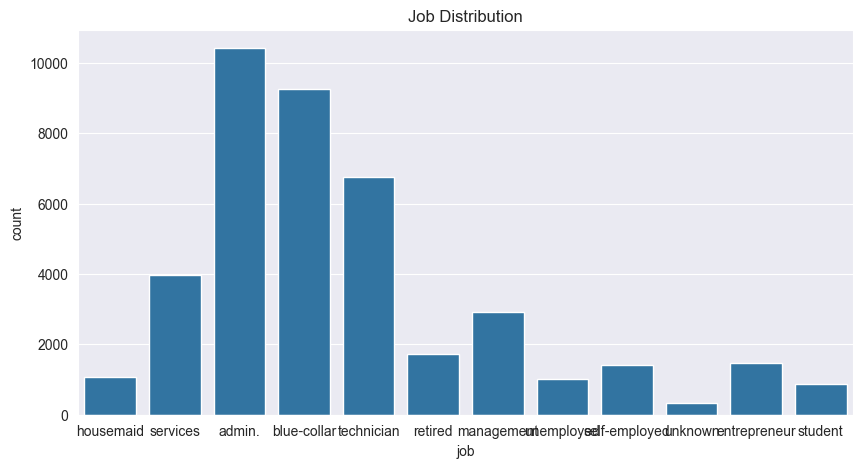

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=bank_client, x='job')
plt.title('Job Distribution')
plt.show()

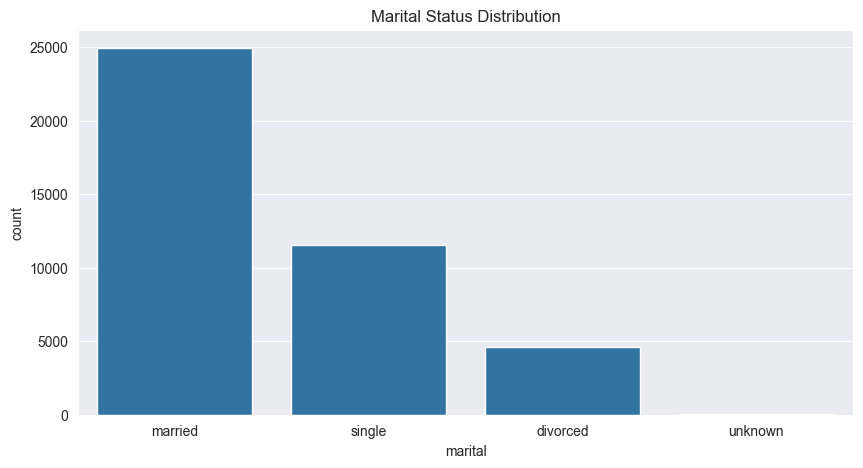

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=bank_client, x='marital')
plt.title('Marital Status Distribution')
plt.show()

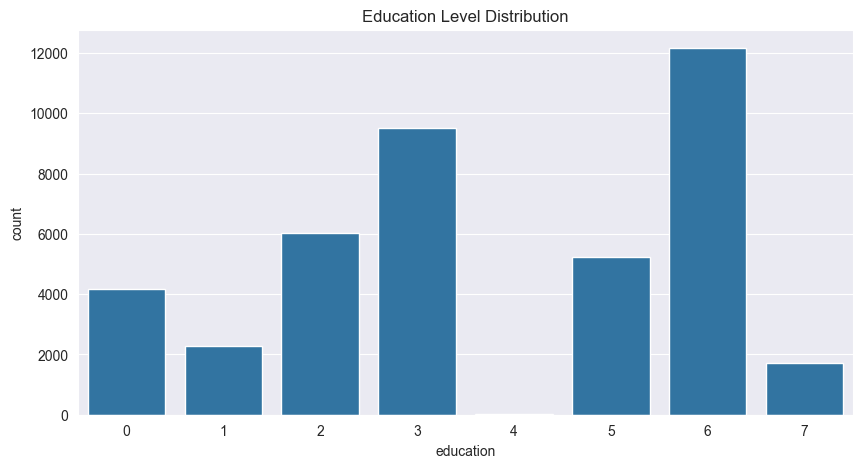

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data=bank_client, x='education')
plt.title('Education Level Distribution')
plt.show()

**Висновки з завдання 6 (детальні)**

1.   Згідно розподілу ми можемо побачити що більша кількість людей у вибірці є одруженими, з вищою освітою та працюють у сфері адміністрування або у сфері послуг.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

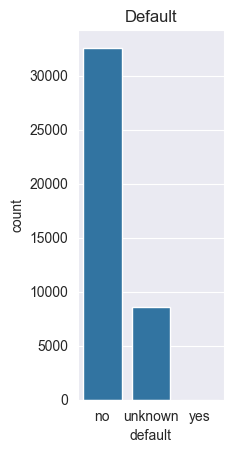

In [45]:
plt.subplot(1, 3, 1)
sns.countplot(x='default', data=df)
plt.title('Default')
plt.show()

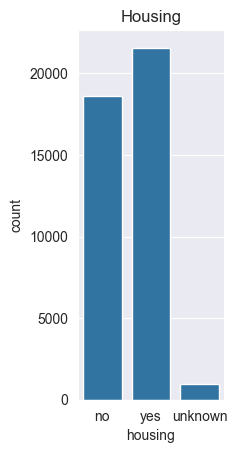

In [46]:
plt.subplot(1, 3, 2)
sns.countplot(x='housing', data=df)
plt.title('Housing')
plt.show()

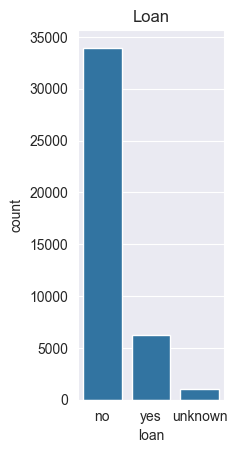

In [47]:
plt.subplot(1, 3, 3)
sns.countplot(x='loan', data=df)
plt.title('Loan')
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [48]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = pd.Series(le.fit_transform(not_null), index=not_null.index)
      
    return df

In [49]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):

In [50]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
    """
    Function for encoding age column
    
    dataframe: pd.DataFrame to encode
    age_col: age col to encode 
    """
    # Calculate quartiles
    Q1 = dataframe[age_col].quantile(0.25)
    Q2 = dataframe[age_col].quantile(0.5)
    Q3 = dataframe[age_col].quantile(0.75)
    
    # Create a new column 'age_group' and assign values based on age quartiles
    dataframe.loc[(dataframe[age_col] <= Q1), 'age_group'] = 'Q1'
    dataframe.loc[(dataframe[age_col] > Q1) & (dataframe[age_col] <= Q2), 'age_group'] = 'Q2'
    dataframe.loc[(dataframe[age_col] > Q2) & (dataframe[age_col] <= Q3), 'age_group'] = 'Q3'
    dataframe.loc[(dataframe[age_col] > Q3), 'age_group'] = 'Q4'
    
    return dataframe

In [51]:
bank_client = encode_age(bank_client, 'age')

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних


In [52]:
print(bank_client.head())

   age  job  marital  education  default  housing  loan age_group
0   56    3        1          0        0        0     0        Q4
1   57    7        1          3        1        0     0        Q4
2   37    7        1          3        0        2     0        Q2
3   40    0        1          1        0        0     0        Q3
4   56    7        1          3        0        0     2        Q4


## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [53]:
bank_relat = df[['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]

print(bank_relat)

print("-----------------------NaN-------------------------")
print(bank_relat.isnull().sum())

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  
0      nonexistent  
1      nonexistent  
2      nonexistent  
3      nonexist

**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [54]:
print("Unique contacts:", bank_relat['contact'].unique())
print("Unique months:", bank_relat['month'].unique())
print("Unique days of week:", bank_relat['day_of_week'].unique())

Unique contacts: ['telephone' 'cellular']
Unique months: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique days of week: ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



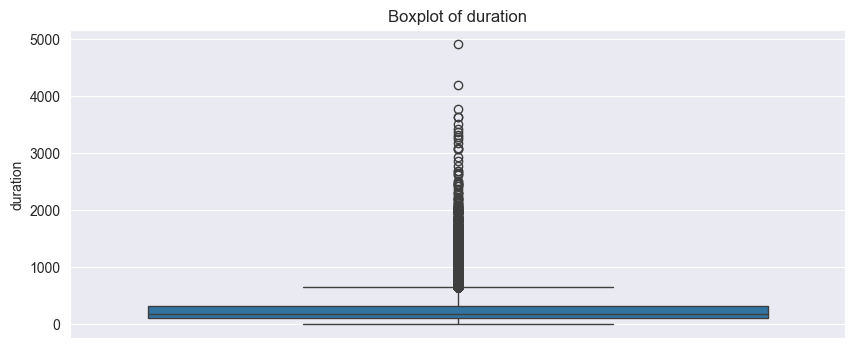

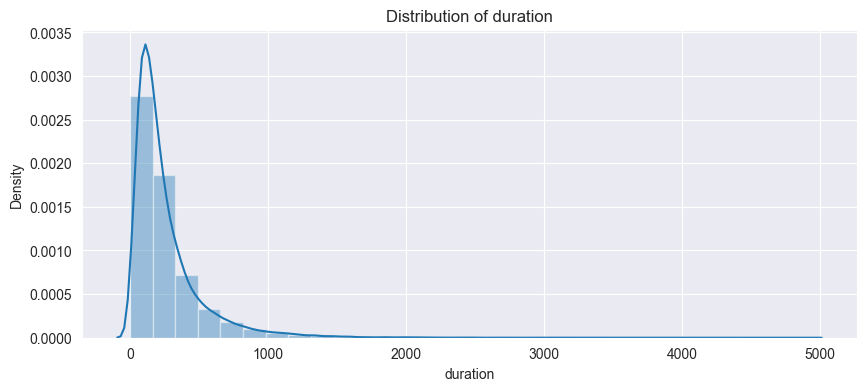

Skewness of duration: 3.263141255262832


In [55]:
plt.figure(figsize=(10, 4))
sns.boxplot(df['duration'])
plt.title('Boxplot of duration')
plt.show()

plt.figure(figsize=(10, 4))
sns.distplot(df['duration'], bins=30)
plt.title('Distribution of duration')
plt.show()

skewness = df['duration'].skew()
print(f'Skewness of duration: {skewness}')

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [56]:
bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [57]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
    """
    Function for encoding duration column
    
    dataframe: pd.DataFrame to encode
    duration_col: duration col to encode 
    """
    
    Q1 = dataframe[duration_col].quantile(0.25)
    Q2 = dataframe[duration_col].quantile(0.5)
    Q3 = dataframe[duration_col].quantile(0.75)
    
    dataframe.loc[(dataframe[duration_col] <= Q1), 'duration_group'] = 'Q1'
    dataframe.loc[(dataframe[duration_col] > Q1) & (dataframe[duration_col] <= Q2), 'duration_group'] = 'Q2'
    dataframe.loc[(dataframe[duration_col] > Q2) & (dataframe[duration_col] <= Q3), 'duration_group'] = 'Q3'
    dataframe.loc[(dataframe[duration_col] > Q3), 'duration_group'] = 'Q4'
    
    return dataframe

In [58]:
bank_relat = encode_duration(bank_relat, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [59]:
bank_socec = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [60]:
bank_other = df[['campaign', 'pdays', 'previous', 'poutcome']]

**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [61]:
le = LabelEncoder()
bank_other['poutcome'] = le.fit_transform(bank_other['poutcome'])

## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [62]:
bank_final = pd.concat([bank_client, bank_other], axis=1)

print(bank_final.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'age_group', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')


**Завдання 19** Провести ділення вибірки

In [63]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [64]:
target = bank_final['age']
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, target, 0.2, 10, 101)

In [65]:
def scale_the_data(X_train: pd.DataFrame,
                   X_test: pd.DataFrame):
    
    sc_X = StandardScaler()
    numeric_cols = X_train.select_dtypes(include=[np.number]).columns

    X_train[numeric_cols] = sc_X.fit_transform(X_train[numeric_cols])
    X_test[numeric_cols] = sc_X.transform(X_test[numeric_cols])

    return X_train, X_test

In [66]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [67]:
y = bank_final['age']
X = bank_final['pdays']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.04806991988346686
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## k-NN

k=1 3.03 (+/- 0.65)
k=2 4.40 (+/- 0.60)
k=3 4.41 (+/- 0.60)
k=4 4.54 (+/- 0.28)
k=5 4.56 (+/- 0.24)
k=6 4.54 (+/- 0.24)
k=7 4.54 (+/- 0.23)
k=8 4.53 (+/- 0.24)
k=9 4.09 (+/- 0.81)
k=10 4.08 (+/- 0.80)
k=11 4.19 (+/- 0.63)
k=12 4.14 (+/- 0.52)
k=13 4.14 (+/- 0.52)
k=14 4.13 (+/- 0.51)
k=15 4.22 (+/- 0.42)
k=16 4.41 (+/- 0.29)
k=17 4.42 (+/- 0.27)
k=18 4.42 (+/- 0.28)
k=19 4.42 (+/- 0.29)
k=20 4.48 (+/- 0.30)
k=21 4.36 (+/- 0.18)
k=22 4.40 (+/- 0.29)
k=23 4.39 (+/- 0.28)
k=24 4.48 (+/- 0.31)
k=25 4.47 (+/- 0.31)
The optimal number of neighbors is 4 with 4.6%


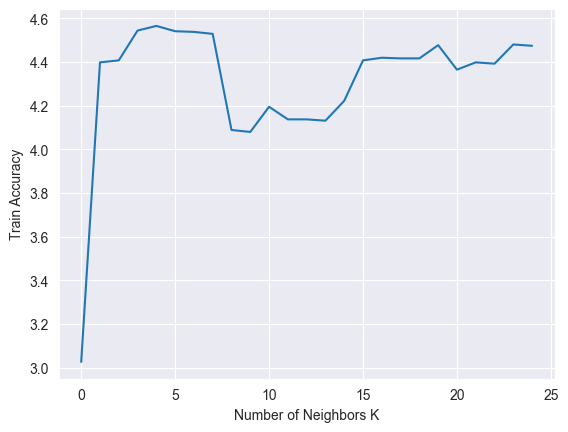

In [68]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [69]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
5.0


## Логістична Регресія

In [73]:
models = pd.DataFrame({
    'Models': ['KNN'],
    'Score':  [round(accuracy_score(y_test, knnpred),2)*100]
})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,KNN,5.0


**Висновки по моделям (детальні)**

1.k-NN модель:
Оптимальна кількість сусідів (k) для моделі k-NN визначена як 4 з точністю приблизно 4.6% на тренувальному наборі даних.
На тестовому наборі даних точність моделі k-NN становить лише 5%, що є дуже низьким показником.
Матриця плутанини показує низьку здатність моделі правильно класифікувати вік клієнтів.

2. Логістична регресія:

Точність логістичної регресії на тестовому наборі даних також дуже низька - всього 5%.
Перехресна перевірка підтверджує цей низький рівень точності з Cross Validation Score близько 4.8%.